In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')
# x = dataset.iloc[ : , 2:].values

In [3]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

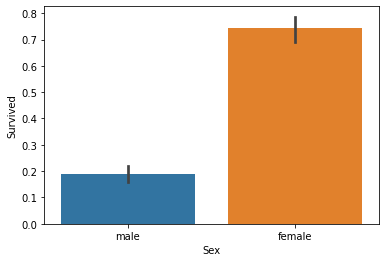

In [4]:
sns.barplot(x="Sex", y="Survived", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

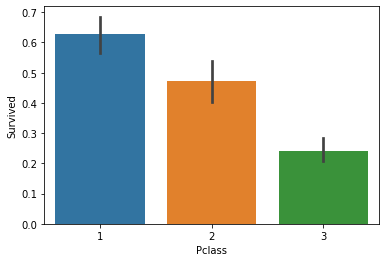

In [5]:
sns.barplot(x="Pclass", y="Survived", data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

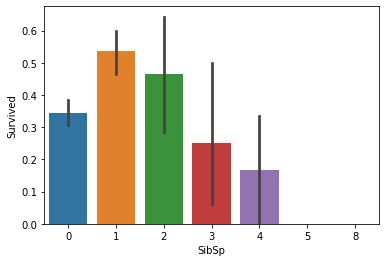

In [6]:
sns.barplot(x="SibSp", y="Survived", data=train)

Text(12.389771412037035, 0.5, 'density')

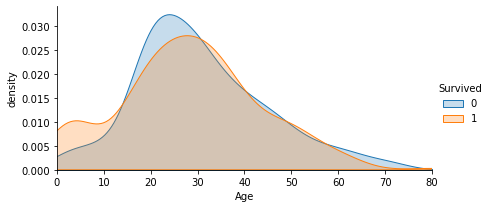

In [7]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density') 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

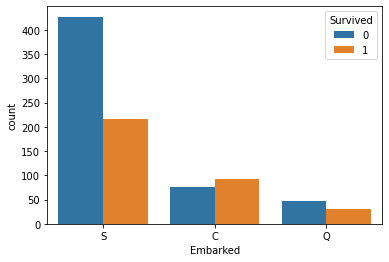

In [8]:
sns.countplot(x='Embarked', hue='Survived',data=train)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

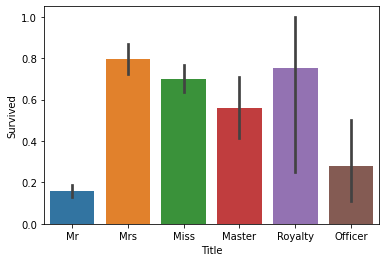

In [9]:
train['Title'] = train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

train['Title'] = train['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=train)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

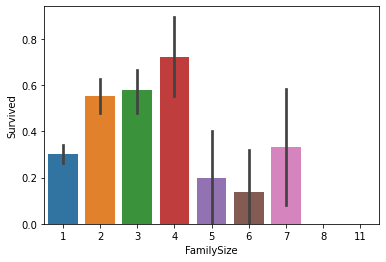

In [10]:
train['FamilySize']=train['SibSp']+train['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=train)

<AxesSubplot:xlabel='FamilyLabel', ylabel='Survived'>

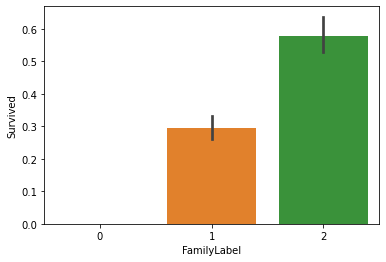

In [11]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
train['FamilyLabel']=train['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=train)

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

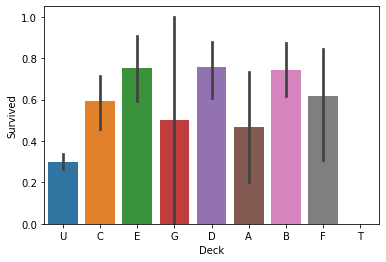

In [103]:
train['Cabin'] = train['Cabin'].fillna('Unknown')
train['Deck']=train['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=train)

Age Feature：Age缺失量为263，缺失量较大，用Sex, Title, Pclass三个特征构建随机森林模型，填充年龄缺失值

In [12]:
from sklearn.ensemble import RandomForestRegressor
age_df = train[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notna()].values
unknown_age = age_df[age_df.Age.isna()].values
X = known_age[:, 1:]
print('X')
print(X)
y = known_age[:, 0]
print('y')
print(y)
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
print(predictedAges)
train.loc[ (train.Age.isna()), 'Age' ] = predictedAges 

X
[[3. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [3. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [3. 0. 1. ... 0. 0. 0.]]
y
[22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   38.   45.
  4.   29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83
 30.   22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.
 26.   59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.
 38.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 32.5  32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.
 19.   37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5
 42.   51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.
  1.    9.   45.   28.   61.    4.    1.   21.   56.   1

In [13]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,1


In [14]:
train.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [15]:
train['Embarked'] = train['Embarked'].fillna('C')

Fare Feature：Fare缺失量为1，缺失Fare信息的乘客的Embarked为S，Pclass为3，所以用Embarked为S，Pclass为3的乘客的Fare中位数填充。

In [20]:
train[train['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel


In [21]:
fare=train[(train['Embarked'] == "S") & (train['Pclass'] == 3)].Fare.median()
train['Fare']=train['Fare'].fillna(fare)

同组识别
把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。

In [22]:
train['Surname']=train['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(train['Surname'].value_counts())
train['FamilyGroup'] = train['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=train.loc[(train['FamilyGroup']>=2) & ((train['Age']<=12) | (train['Sex']=='female'))]
Male_Adult_Group=train.loc[(train['FamilyGroup']>=2) & (train['Age']>12) & (train['Sex']=='male')]

发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。

In [26]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,79
0.000000,26
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverageSurvived')

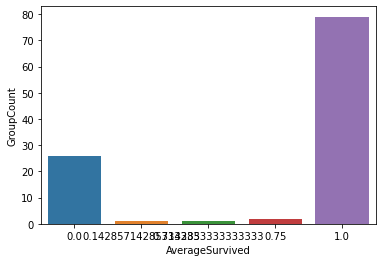

In [27]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')

绝大部分成年男性组的平均存活率也为1或0。

In [28]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,83
1.000000,13
0.500000,6
0.333333,2
0.250000,1
